In [1]:
import json

import pandas as pd

In [3]:
df = pd.read_parquet("git_sample.parquet")

In [4]:
df.head()

,type,public,payload,repo,actor,org,created_at,id,other
0,PushEvent,True,"{""push_id"":10103527018,""size"":1,""distinct_size...","{'id': 501200637, 'name': 'tzlio/ph', 'url': '...",{'avatar_url': 'https://avatars.githubusercont...,None,2022-06-08 10:59:09+00:00,22224147329,"{""actor"":{""display_login"":""tzlio""}}"
1,PushEvent,True,"{""push_id"":10103078746,""size"":1,""distinct_size...","{'id': 465372512, 'name': '2M4U/2m4u', 'url': ...",{'avatar_url': 'https://avatars.githubusercont...,None,2022-06-08 10:10:22+00:00,22223238329,"{""actor"":{""display_login"":""github-actions""}}"
2,PushEvent,True,"{""push_id"":10103073644,""size"":2,""distinct_size...","{'id': 367749487, 'name': 'HMacN/gin', 'url': ...",{'avatar_url': 'https://avatars.githubusercont...,None,2022-06-08 10:09:53+00:00,22223228133,"{""actor"":{""display_login"":""HMacN""}}"
3,PushEvent,True,"{""push_id"":10103108020,""size"":1,""distinct_size...","{'id': 470199056, 'name': 'fzdwx/sky', 'url': ...",{'avatar_url': 'https://avatars.githubusercont...,None,2022-06-08 10:13:24+00:00,22223297713,"{""actor"":{""display_login"":""fzdwx""}}"
4,ForkEvent,True,"{""forkee"":{""id"":501199702,""node_id"":""R_kgDOHd-...","{'id': 282803616, 'name': 'ldqk/ldqk', 'url': ...",{'avatar_url': 'https://avatars.githubusercont...,None,2022-06-08 10:18:30+00:00,22223396213,"{""actor"":{""display_login"":""eryajf""}}"


In [5]:
## json loads
for col in ("payload", "other"): ## actor는 이미 되어있음
    df[col] = df[col].apply(json.loads)

In [6]:
df.head()

,type,public,payload,repo,actor,org,created_at,id,other
0,PushEvent,True,"{'push_id': 10103527018, 'size': 1, 'distinct_...","{'id': 501200637, 'name': 'tzlio/ph', 'url': '...",{'avatar_url': 'https://avatars.githubusercont...,None,2022-06-08 10:59:09+00:00,22224147329,{'actor': {'display_login': 'tzlio'}}
1,PushEvent,True,"{'push_id': 10103078746, 'size': 1, 'distinct_...","{'id': 465372512, 'name': '2M4U/2m4u', 'url': ...",{'avatar_url': 'https://avatars.githubusercont...,None,2022-06-08 10:10:22+00:00,22223238329,{'actor': {'display_login': 'github-actions'}}
2,PushEvent,True,"{'push_id': 10103073644, 'size': 2, 'distinct_...","{'id': 367749487, 'name': 'HMacN/gin', 'url': ...",{'avatar_url': 'https://avatars.githubusercont...,None,2022-06-08 10:09:53+00:00,22223228133,{'actor': {'display_login': 'HMacN'}}
3,PushEvent,True,"{'push_id': 10103108020, 'size': 1, 'distinct_...","{'id': 470199056, 'name': 'fzdwx/sky', 'url': ...",{'avatar_url': 'https://avatars.githubusercont...,None,2022-06-08 10:13:24+00:00,22223297713,{'actor': {'display_login': 'fzdwx'}}
4,ForkEvent,True,"{'forkee': {'id': 501199702, 'node_id': 'R_kgD...","{'id': 282803616, 'name': 'ldqk/ldqk', 'url': ...",{'avatar_url': 'https://avatars.githubusercont...,None,2022-06-08 10:18:30+00:00,22223396213,{'actor': {'display_login': 'eryajf'}}


### EDA

In [5]:
df.isna().mean()

type          0.000000
public        0.000000
payload       0.000000
repo          0.000000
actor         0.000000
org           0.701165
created_at    0.000000
id            0.000000
other         0.000000
dtype: float64

In [7]:
## 이벤트 종류
df["type"].value_counts()

type
PushEvent                        70371
CreateEvent                      18630
PullRequestEvent                 11166
IssueCommentEvent                 7795
WatchEvent                        6207
DeleteEvent                       4398
PullRequestReviewEvent            3951
IssuesEvent                       3146
PullRequestReviewCommentEvent     2498
ForkEvent                         2184
CommitCommentEvent                 751
ReleaseEvent                       733
PublicEvent                        492
MemberEvent                        384
GollumEvent                        294
Name: count, dtype: int64

In [8]:
# no private repos
df.public.value_counts()

public
True    133000
Name: count, dtype: Int64

In [9]:
df.loc[df["type"] == "PushEvent"].iloc[0]

type                                                  PushEvent
public                                                     True
payload       {'push_id': 10103527018, 'size': 1, 'distinct_...
repo          {'id': 501200637, 'name': 'tzlio/ph', 'url': '...
actor         {'avatar_url': 'https://avatars.githubusercont...
org                                                        None
created_at                            2022-06-08 10:59:09+00:00
id                                                  22224147329
other                     {'actor': {'display_login': 'tzlio'}}
Name: 0, dtype: object

In [8]:
## Push event example
push_example = df.loc[df["type"] == "PushEvent"].iloc[0]
for k, v in push_example.items():
    print(f"{k.upper()}: {v}\n")

TYPE: PushEvent

PUBLIC: True

PAYLOAD: {'push_id': 10103527018, 'size': 1, 'distinct_size': 1, 'ref': 'refs/heads/main', 'head': '7004aa5e3263cf89f086ab67df422844b09bae7d', 'before': 'dcd18aa6d3337a99190f406f8a63370406daffee', 'commits': [{'sha': '7004aa5e3263cf89f086ab67df422844b09bae7d', 'author': {'email': 'd2ceb7eec98c76e4e72cb986459d3ec9db1ede11@users.noreply.github.com', 'name': 'tzlio'}, 'message': 'Update PornHub.py', 'distinct': True, 'url': 'https://api.github.com/repos/tzlio/ph/commits/7004aa5e3263cf89f086ab67df422844b09bae7d'}]}

REPO: {'id': 501200637, 'name': 'tzlio/ph', 'url': 'https://api.github.com/repos/tzlio/ph'}

ACTOR: {'avatar_url': 'https://avatars.githubusercontent.com/u/98939055?', 'gravatar_id': '', 'id': 98939055, 'login': 'tzlio', 'url': 'https://api.github.com/users/tzlio'}

ORG: None

CREATED_AT: 2022-06-08 10:59:09+00:00

ID: 22224147329

OTHER: {'actor': {'display_login': 'tzlio'}}



In [9]:
## Issue event example
issue_example = df.loc[df["type"] == "IssuesEvent"].iloc[0]
for k, v in issue_example.items():
    print(f"{k.upper()}: {v}\n")

TYPE: IssuesEvent

PUBLIC: True

PAYLOAD: {'action': 'opened', 'issue': {'url': 'https://api.github.com/repos/yuk7/ArchWSL/issues/289', 'repository_url': 'https://api.github.com/repos/yuk7/ArchWSL', 'labels_url': 'https://api.github.com/repos/yuk7/ArchWSL/issues/289/labels{/name}', 'comments_url': 'https://api.github.com/repos/yuk7/ArchWSL/issues/289/comments', 'events_url': 'https://api.github.com/repos/yuk7/ArchWSL/issues/289/events', 'html_url': 'https://github.com/yuk7/ArchWSL/issues/289', 'id': 1264522257, 'node_id': 'I_kwDOBrzS0c5LXxQR', 'number': 289, 'title': 'C function `clock_getres` does not return zero for monotonic clock in WSL1', 'user': {'login': 'horror-proton', 'id': 107091537, 'node_id': 'U_kgDOBmIWUQ', 'avatar_url': 'https://avatars.githubusercontent.com/u/107091537?v=4', 'gravatar_id': '', 'url': 'https://api.github.com/users/horror-proton', 'html_url': 'https://github.com/horror-proton', 'followers_url': 'https://api.github.com/users/horror-proton/followers', 'foll

In [10]:
## PR event example
pr_example = df.loc[df["type"] == "PullRequestEvent"].iloc[0]
for k, v in pr_example.items():
    print(f"{k.upper()}: {v}\n")

TYPE: PullRequestEvent

PUBLIC: True

PAYLOAD: {'action': 'opened', 'number': 163, 'pull_request': {'url': 'https://api.github.com/repos/ab455/abaas/pulls/163', 'id': 961466952, 'node_id': 'PR_kwDOGFHPq845TtJI', 'html_url': 'https://github.com/ab455/abaas/pull/163', 'diff_url': 'https://github.com/ab455/abaas/pull/163.diff', 'patch_url': 'https://github.com/ab455/abaas/pull/163.patch', 'issue_url': 'https://api.github.com/repos/ab455/abaas/issues/163', 'number': 163, 'state': 'open', 'locked': False, 'title': 'Bump @mdn/yari from 0.4.778 to 1.2.5', 'user': {'login': 'dependabot[bot]', 'id': 49699333, 'node_id': 'MDM6Qm90NDk2OTkzMzM=', 'avatar_url': 'https://avatars.githubusercontent.com/in/29110?v=4', 'gravatar_id': '', 'url': 'https://api.github.com/users/dependabot%5Bbot%5D', 'html_url': 'https://github.com/apps/dependabot', 'followers_url': 'https://api.github.com/users/dependabot%5Bbot%5D/followers', 'following_url': 'https://api.github.com/users/dependabot%5Bbot%5D/following{/othe

In [11]:
df[df.org.notna()].iloc[0]

type                                                 WatchEvent
public                                                     True
payload                                   {'action': 'started'}
repo          {'id': 99134486, 'name': 'braintree/sanitize-u...
actor         {'avatar_url': 'https://avatars.githubusercont...
org           {'avatar_url': 'https://avatars.githubusercont...
created_at                            2022-06-08 10:01:15+00:00
id                                                  22223052429
other                  {'actor': {'display_login': 'Hongbusi'}}
Name: 1367, dtype: object

<Axes: xlabel='created_at'>

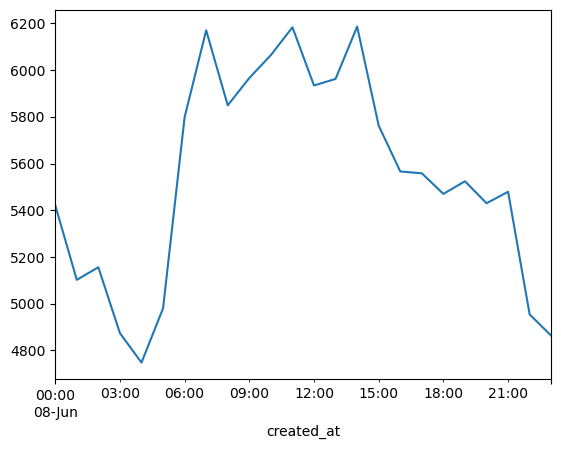

In [12]:
## hourly event count
df.created_at.dt.floor("H").value_counts().sort_index().plot()

## Scenarios

### Get languages from PRs

In [13]:
languages = df.loc[df["type"] == "PullRequestEvent", "payload"].str["pull_request"].str["head"].str["repo"].str["language"]
languages.value_counts().head(30)

payload
JavaScript          1808
TypeScript          1645
Python              1067
Java                 685
HTML                 556
Go                   539
Ruby                 335
C#                   330
Rust                 301
C++                  259
PHP                  213
Vue                  194
Shell                186
Kotlin               182
C                    134
CSS                  131
Jupyter Notebook      83
Dockerfile            83
HCL                   76
SCSS                  72
Roff                  63
Dart                  57
Swift                 54
Scala                 54
Julia                 52
Lua                   32
Svelte                25
Makefile              25
DM                    24
Jinja                 24
Name: count, dtype: int64

### Top stars

In [14]:
df_star = df[df["type"] == "WatchEvent"]

In [15]:
df_star.payload.str["action"].value_counts() ## 나중에 더 뒤져보면 ended가 있을 수도

payload
started    6207
Name: count, dtype: int64

In [16]:
top_star_repos = df_star.repo.str["id"].value_counts()

In [17]:
df_star.loc[df_star.repo.str["id"].isin(top_star_repos.index[:5]), "repo"].str["name"].value_counts()

repo
borisdayma/dalle-mini          14
PlasmoHQ/plasmo                13
digitalocean/nginxconfig.io    12
jina-ai/dalle-flow             12
Lissy93/dashy                  11
Name: count, dtype: int64

### Issue text

In [18]:
issue_payload = df.loc[df["type"] == "IssuesEvent", "payload"]
issue_title = issue_payload.str["issue"].str["title"]
issue_body = issue_payload.str["issue"].str["body"]

issue_text = pd.concat([issue_title, issue_body], axis=1)
issue_text.columns = ["title", "body"]

In [19]:
issue_text ## NLP analysis available afterwards

,title,body
60,C function `clock_getres` does not return zero...,**Describe the issue**\r\nC function `clock_ge...
125,"🛑 Etruria, 37 is down",In [`e32cdab`](https://github.com/javisu/monit...
161,BIRR_07,Ver: https://github.com/eflipe/python-exercise...
196,Codecov badge gives incorrect percentag,"### Description of Bug\r\n\r\nAs of writing, c..."
207,[Feature]: Add cover art to now playing UI popup,Problem:\r\nCover art is not shown on Now Play...
...,...,...
132826,Incomplete text from configure-cgroup-driver.md,**This is a Bug Report**\r\n\r\n<!-- Thanks fo...
132890,CVE-2019-15666 (Medium) detected in linux-stab...,## CVE-2019-15666 - Medium Severity Vulnerabil...
132919,archive_request,https://wechatscope.jmsc.hku.hk/api/html?fn=gh...
132958,work.weixin.qq.com,\r\n### Issue URL (Incorrect Blocking)\r\n [ht...


### Korean issue

In [20]:
import re

# 정규표현식 패턴: 한글 유니코드 범위 (가-힣)
korean_pattern = re.compile(r'[가-힣]')

In [21]:
issue_text_kr = issue_text[issue_text["body"].str.match(korean_pattern) == True]
issue_text_kr

,title,body
7063,간단한 Front View 구현,간단한 Front View 구현
18404,배포,깃헙 페이지에 배포
40907,버전 관리 정책,"패키지 버전, Release 관리"
49020,hits badge의 URL 변경이 필요합니다,안녕하세요 민지님.\r\n\r\n우연히 제 README.md가 forked 된 것을...
82034,getComment 주소형식에 따라서 저장이 안되는 문제 문의 드립니다.,안녕하세요. 훌륭한 패키지 만들어 주셔서 감사합니다. \r\ngetComment 사...
82364,Preliminary BOM Logic 변경,단순 json => List<String> 으로 저장해두긔
83387,#5 장바구니,"장바구니 조회 ,추가, 삭제 기능"
118477,댓글 붙이기,페이스북 댓글로?
126148,[newStart_week2]프로그래머스,순위검색 - https://programmers.co.kr/learn/courses...
